<a href="https://colab.research.google.com/github/MohonaMohsin/stroke-prediction-classifiers/blob/main/stroke_risk_prediction_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Stroke Using Classification Models**

Mount Google Drive to Access Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Stroke Prediction: Libraries and Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import shap
import warnings
warnings.filterwarnings('ignore')

Display Top 5 Rows of The Dataset




In [ ]:
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(5110, 12)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 5110
Number of Columns 12


Get Information About Our Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Check Null Values In The Dataset

In [ ]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Get Overall Statistics About The Dataset

In [ ]:
# Checking distribution of categorical data
print("Gender Distribution:\n", data.gender.value_counts(), "\n")
print("Residence Type Distribution:\n", data.Residence_type.value_counts(), "\n")
print("Work Type Distribution:\n", data.work_type.value_counts(), "\n")
print("Ever Married Distribution:\n", data.ever_married.value_counts(), "\n")
print("Smoking Status Distribution:\n", data.smoking_status.value_counts(), "\n")
print("Stroke Distribution:\n", data.stroke.value_counts(), "\n")


Gender Distribution:
 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 

Residence Type Distribution:
 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64 

Work Type Distribution:
 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 

Ever Married Distribution:
 ever_married
Yes    3353
No     1757
Name: count, dtype: int64 

Smoking Status Distribution:
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64 

Stroke Distribution:
 stroke
0    4861
1     249
Name: count, dtype: int64 



In [ ]:
# Automatically print value counts for all categorical columns
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col} Distribution:")
    print(data[col].value_counts())
    print("-" * 40)


gender Distribution:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
----------------------------------------
ever_married Distribution:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
----------------------------------------
work_type Distribution:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
----------------------------------------
Residence_type Distribution:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
----------------------------------------
smoking_status Distribution:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
----------------------------------------


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


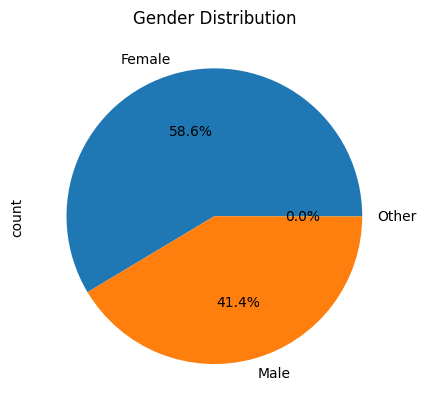

In [ ]:
data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')
plt.show()


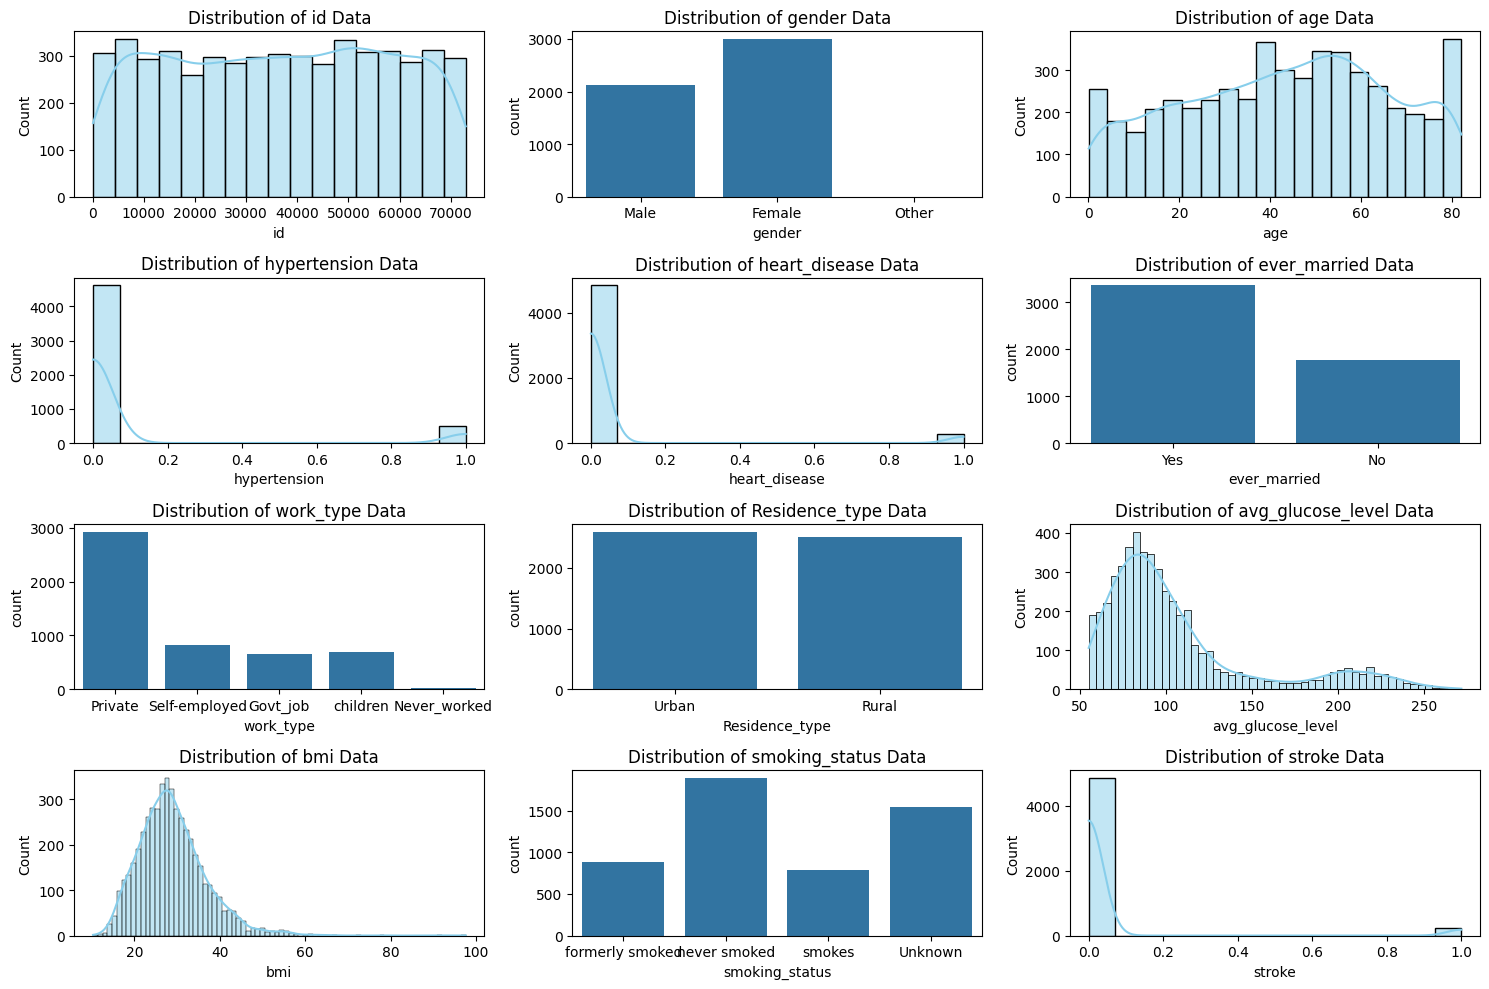

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, col in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col} Data")

    # Check if column is numeric or categorical
    if data[col].dtype == 'object':
        sns.countplot(x=data[col])
    else:
        sns.histplot(data[col], kde=True, color='skyblue')

    plt.tight_layout()

plt.show()


#Data Preprocessing :

Check Missing Values

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

# Total missing values
total_missing = data.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}\n")

# Missing values per column
missing_per_column = data.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_per_column)


Total missing values in dataset: 201

Missing values per column:
bmi                  201
id                     0
age                    0
gender                 0
hypertension           0
heart_disease          0
work_type              0
ever_married           0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64


Handle Missing Value


In [ ]:
# Fill missing BMI values with median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# Verify missing values
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Drop Unnecessary Columns

In [ ]:
# Drop 'id' column as it is not useful for prediction
data = data.drop(columns=['id'])

# Check columns
print("Columns after dropping ID:", data.columns.tolist())


Columns after dropping ID: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


Visualize Outliers Using Boxplots

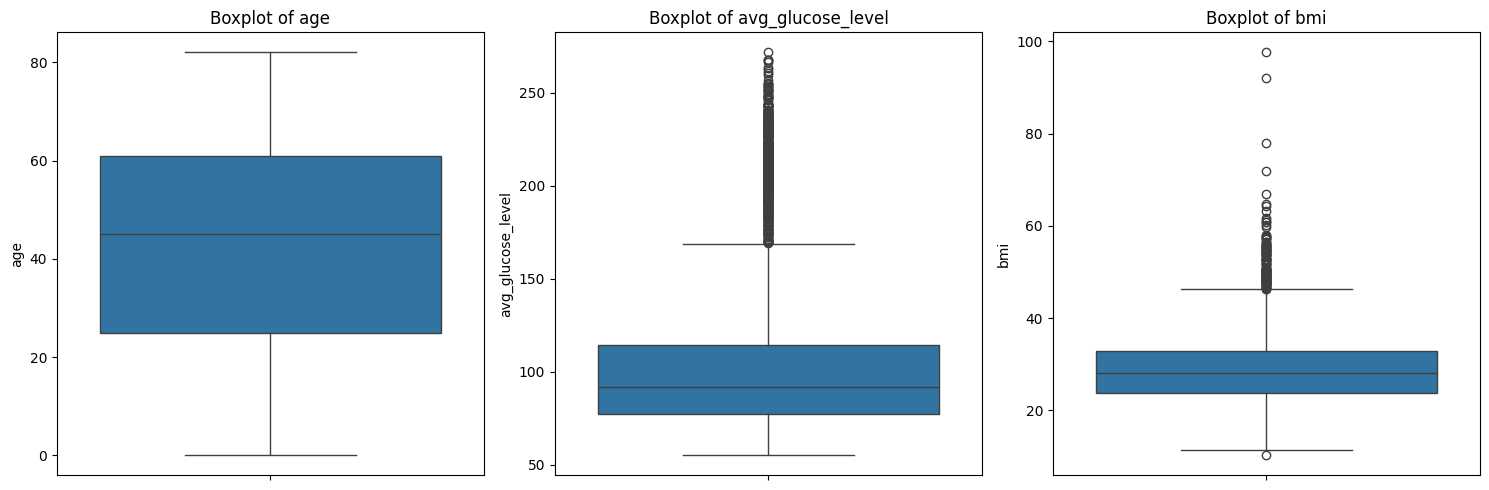

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15,5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Detect Outliers Using IQR Method

In [ ]:
# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Check number of outliers per column
for col in numeric_cols:
    outliers = detect_outliers(data, col)
    print(f"{col} outliers: {len(outliers)}")


age outliers: 0
avg_glucose_level outliers: 627
bmi outliers: 126


Handle Outliers Using Winsorization (Capping)

In [ ]:
numeric_cols = ['avg_glucose_level', 'bmi']  # age has no outliers

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # Cap the outliers
    data[col] = data[col].clip(lower_bound, upper_bound)

    print(f"{col} outliers capped between {lower_bound:.2f} and {upper_bound:.2f}")


avg_glucose_level outliers capped between 21.98 and 169.36
bmi outliers capped between 10.30 and 46.30


In [ ]:
# Re-check outliers after capping
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numeric_cols + ['age']:
    outliers = detect_outliers(data, col)
    print(f"{col} outliers after handling: {len(outliers)}")


avg_glucose_level outliers after handling: 0
bmi outliers after handling: 0
age outliers after handling: 0


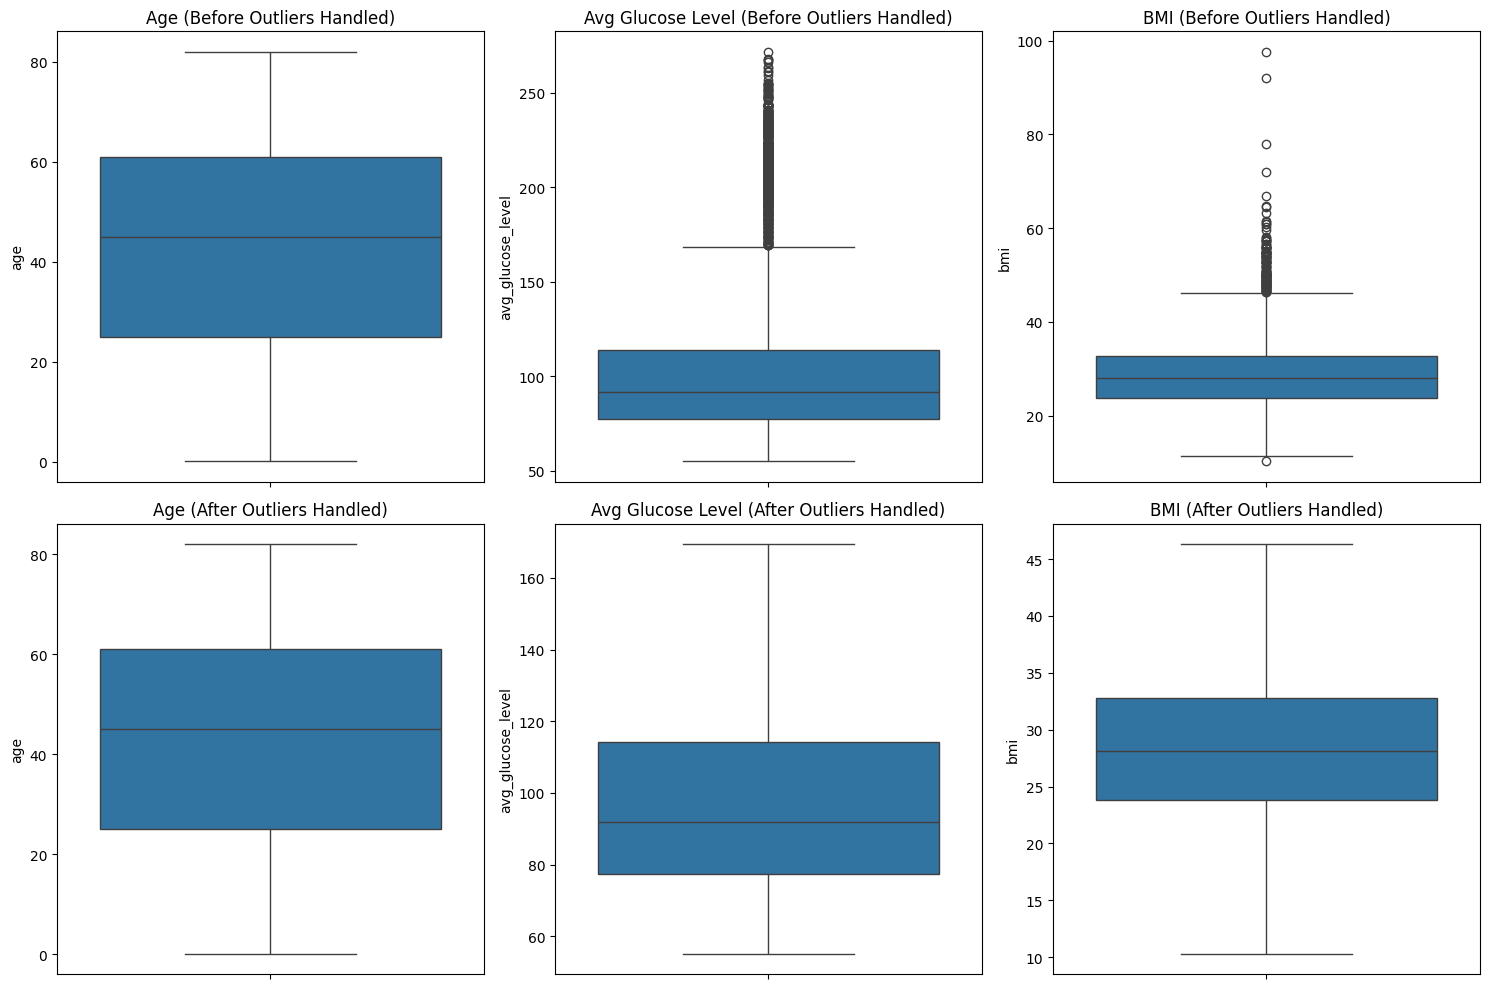

In [ ]:
# Visualize distributions before and after outlier handling
plt.figure(figsize=(15, 10))

# Before Outlier Handling
plt.subplot(2, 3, 1)
sns.boxplot(y=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')['age'])
plt.title("Age (Before Outliers Handled)")

plt.subplot(2, 3, 2)
sns.boxplot(y=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')['avg_glucose_level'])
plt.title("Avg Glucose Level (Before Outliers Handled)")

plt.subplot(2, 3, 3)
sns.boxplot(y=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')['bmi'].fillna(pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')['bmi'].median()))
plt.title("BMI (Before Outliers Handled)")

# After Outlier Handling
plt.subplot(2, 3, 4)
sns.boxplot(y=data['age'])
plt.title("Age (After Outliers Handled)")

plt.subplot(2, 3, 5)
sns.boxplot(y=data['avg_glucose_level'])
plt.title("Avg Glucose Level (After Outliers Handled)")

plt.subplot(2, 3, 6)
sns.boxplot(y=data['bmi'])
plt.title("BMI (After Outliers Handled)")

plt.tight_layout()
plt.show()

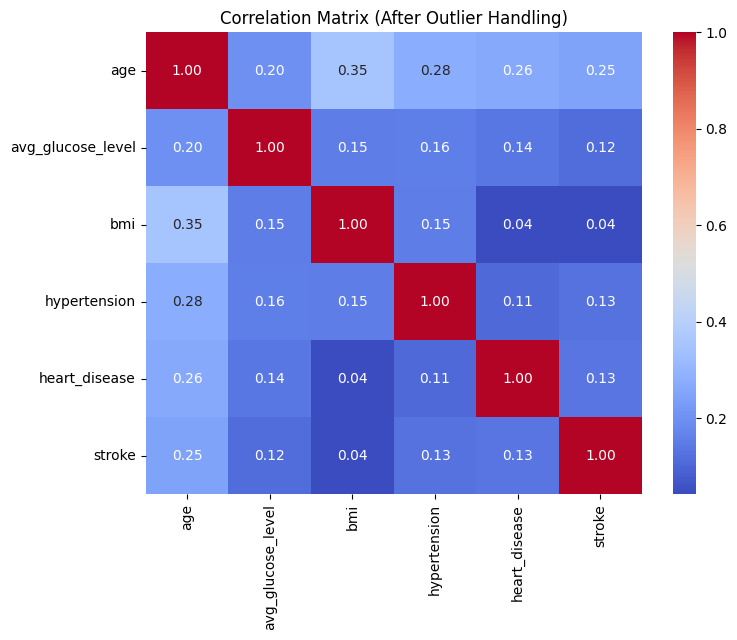

Correlation of features with stroke:

stroke               1.000000
age                  0.245257
heart_disease        0.134914
hypertension         0.127904
avg_glucose_level    0.115652
bmi                  0.042700
Name: stroke, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric columns including target
numeric_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']

# 1️⃣ Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# 2️⃣ Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (After Outlier Handling)")
plt.show()

# 3️⃣ Correlation of each feature with target (stroke)
corr_with_target = corr_matrix['stroke'].sort_values(ascending=False)
print("Correlation of features with stroke:\n")
print(corr_with_target)


Split Features and Target

In [ ]:
# Features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

print("Feature columns:", X.columns.tolist())
print("Target column:", 'stroke')


Feature columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
Target column: stroke


Identify Numeric and Categorical Columns

In [ ]:
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['age', 'avg_glucose_level', 'bmi']
Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


Preprocessing Pipelines

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numeric pipeline: scale
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical pipeline: one-hot encode
categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


Split Data into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (4088, 10)
Testing set shape: (1022, 10)


Apply Preprocessing

In [ ]:
# Fit on training data, transform both train and test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed training features shape:", X_train_processed.shape)
print("Processed testing features shape:", X_test_processed.shape)


Processed training features shape: (4088, 19)
Processed testing features shape: (1022, 19)


# **Model Training & Evaluation**

Import Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


Create a Dictionary of Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}


Train Models and Evaluate Accuracy

In [ ]:

# Store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'ROC-AUC': []
}

for name, model in models.items():
    # Train
    model.fit(X_train_processed, y_train)

    # Predict
    y_pred = model.predict(X_test_processed)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_processed)[:,1])

    # Print metrics
    print(f"Model: {name}")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print('-'*60)

    # Append to metrics dictionary
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['F1 Score'].append(f1)
    metrics['ROC-AUC'].append(roc_auc)

# Convert to DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(metrics).sort_values(by='ROC-AUC', ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df)


Model: Logistic Regression
  Accuracy: 0.9511
  F1 Score: 0.0000
  ROC-AUC: 0.8422
------------------------------------------------------------
Model: Random Forest
  Accuracy: 0.9462
  F1 Score: 0.0351
  ROC-AUC: 0.7794
------------------------------------------------------------
Model: Gradient Boosting
  Accuracy: 0.9481
  F1 Score: 0.0000
  ROC-AUC: 0.8316
------------------------------------------------------------
Model: AdaBoost
  Accuracy: 0.9521
  F1 Score: 0.0392
  ROC-AUC: 0.8361
------------------------------------------------------------
Model: XGBoost
  Accuracy: 0.9442
  F1 Score: 0.0952
  ROC-AUC: 0.8055
------------------------------------------------------------
Model: SVM
  Accuracy: 0.9511
  F1 Score: 0.0000
  ROC-AUC: 0.7138
------------------------------------------------------------

Model Performance Comparison:

                 Model  Accuracy  F1 Score   ROC-AUC
0  Logistic Regression  0.951076  0.000000  0.842202
3             AdaBoost  0.952055  0.039216  0

**Model Performance Comparison (Bar Plot)**

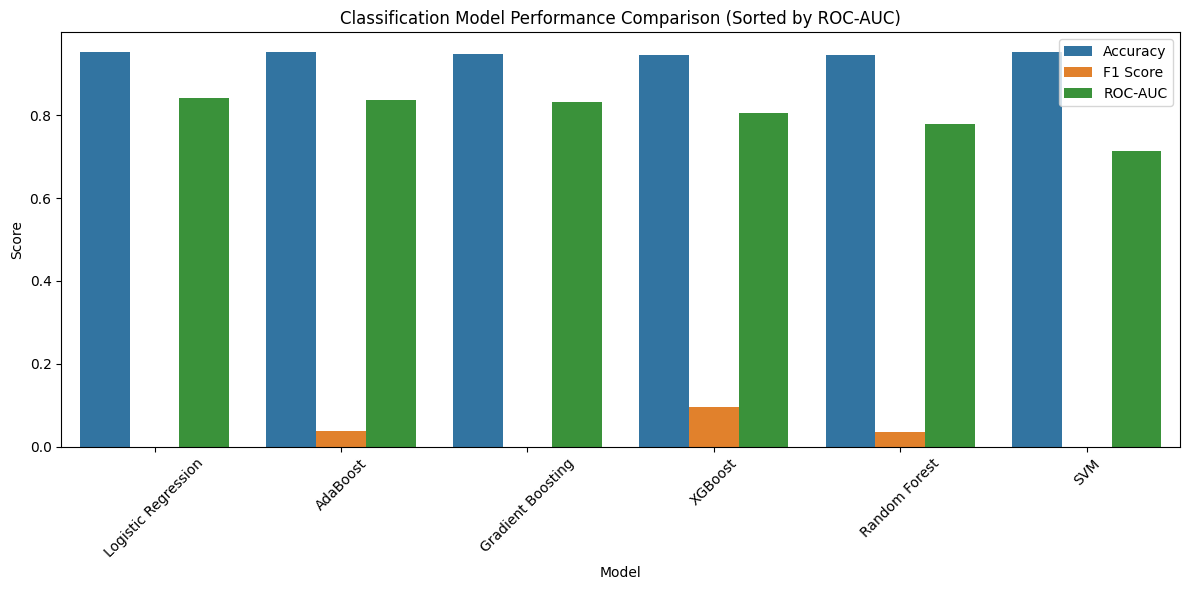

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming metrics dictionary from previous step
metrics_df = pd.DataFrame(metrics)

# Sort models by ROC-AUC (best classifier first)
metrics_df_sorted = metrics_df.sort_values(by='ROC-AUC', ascending=False)

# Preserve model order for plotting
ordered_models = metrics_df_sorted['Model'].tolist()

# Melt for seaborn plotting using classification metrics
metrics_melted = pd.melt(metrics_df_sorted, id_vars='Model',
                         value_vars=['Accuracy', 'F1 Score', 'ROC-AUC'],
                         var_name='Metric', value_name='Score')

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', order=ordered_models)

plt.title('Classification Model Performance Comparison (Sorted by ROC-AUC)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
# Convert metrics dictionary to DataFrame (if not already)
metrics_df = pd.DataFrame(metrics)

# Display model comparison table
print("Model Comparison Table:")
print(metrics_df[['Model', 'Accuracy', 'F1 Score', 'ROC-AUC']])


Model Comparison Table:
                 Model  Accuracy  F1 Score   ROC-AUC
0  Logistic Regression  0.951076  0.000000  0.842202
1        Random Forest  0.946184  0.035088  0.779362
2    Gradient Boosting  0.948141  0.000000  0.831626
3             AdaBoost  0.952055  0.039216  0.836101
4              XGBoost  0.944227  0.095238  0.805473
5                  SVM  0.951076  0.000000  0.713786


Identify the Best Model

In [ ]:
# Sort table by ROC-AUC to see best model on top
best_model_df = metrics_df.sort_values(by='ROC-AUC', ascending=False)
print("Best Model Based on ROC-AUC:")
print(best_model_df.head(1))


Best Model Based on ROC-AUC:
                 Model  Accuracy  F1 Score   ROC-AUC
0  Logistic Regression  0.951076       0.0  0.842202


Save the Best Model

In [ ]:
import joblib

best_model_name = best_model_df.iloc[0]['Model']
best_model = models[best_model_name]

# Save to file
joblib.dump(best_model, '/content/best_stroke_model.pkl')
print(f"{best_model_name} saved successfully!")


Logistic Regression saved successfully!


Make Predictions on New Data

In [ ]:
# Example new data
import numpy as np
new_data = pd.DataFrame({
    'age': [55],
    'avg_glucose_level': [140.2],
    'bmi': [28.5],
    'hypertension': [0],
    'heart_disease': [0],
    'gender': ['Male'],
    'ever_married': ['Yes'],
    'work_type': ['Private'],
    'Residence_type': ['Urban'],
    'smoking_status': ['never smoked']
})

# Preprocess
new_data_processed = preprocessor.transform(new_data)

# Predict stroke probability
pred_prob = best_model.predict_proba(new_data_processed)[:,1]
pred_class = best_model.predict(new_data_processed)

print(f"Predicted Stroke Probability: {pred_prob[0]:.2f}")
print(f"Predicted Class (0=No, 1=Yes): {pred_class[0]}")


Predicted Stroke Probability: 0.05
Predicted Class (0=No, 1=Yes): 0
